# Week 4: Exploratory Data Analysis (Categorical Variables + Numerical Variables) + Data Manipulation

**Sources:**

- Python for Marketing Reserach and Analytics. J. Schwarz, C. Chapman, and E.M. Feit. Springer 2020.
- Matplotlib: https://matplotlib.org
- Seaborn for Categorical Data: https://seaborn.pydata.org/tutorial/categorical.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# use ggplot style when plotting
plt.style.use('ggplot')

# set the plot figure size to 10x6
plt.rcParams["figure.figsize"]=10,6

(0.0, 300.0, 0.0, 150.0)

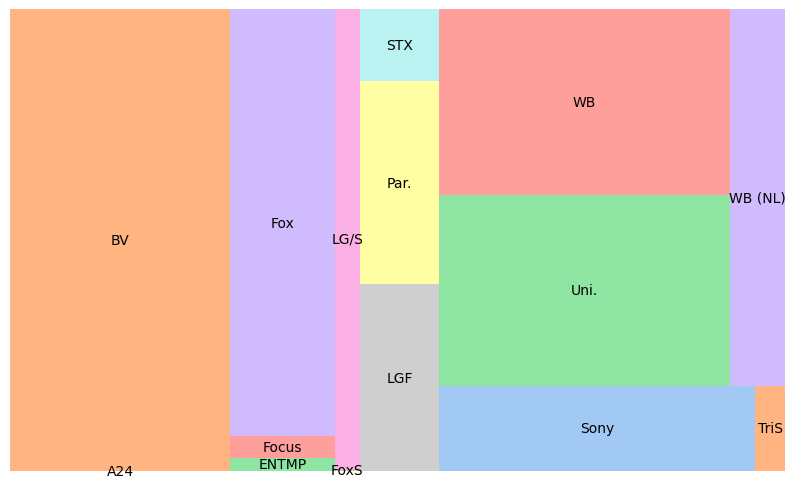

In [16]:
box_rev=pd.read_excel('BoxOffice.xlsx')
studio_rev=box_rev.groupby('Studio').Opening.sum()
studio_rev
squarify.plot(sizes=studio_rev, label = studio_rev.index, norm_x=300, norm_y=150,color=sns.color_palette('pastel',len(studio_rev.index)))
plt.axis('off')


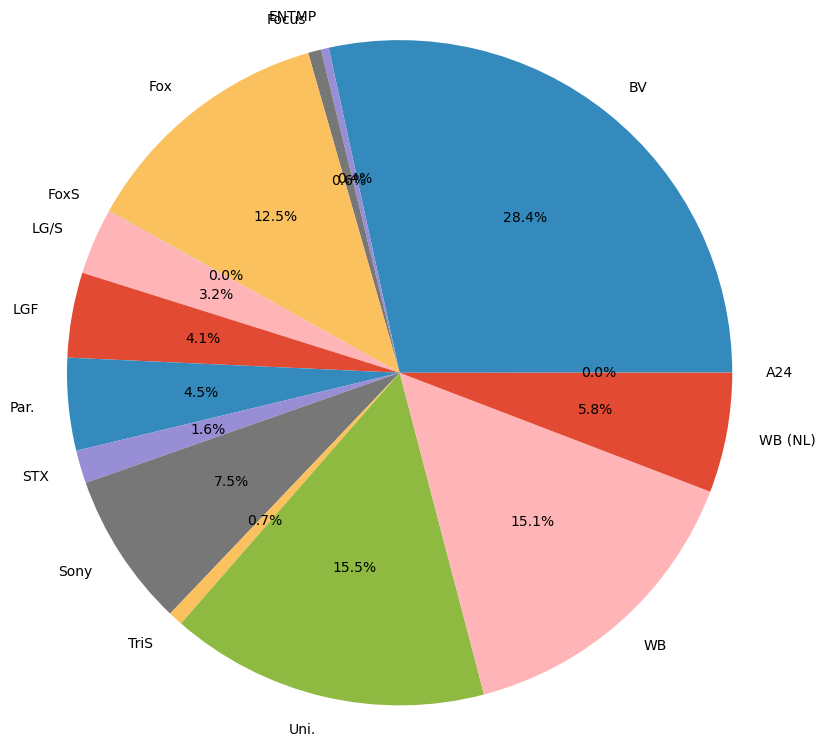

In [4]:
plt.pie(studio_rev,labels=studio_rev.index, radius=1.8,autopct='%.1f%%')
plt.show()

`pandas` provide data scientists with differen methods and APIs (application programming interface) to read data from different sources. The following table shows some of the interfaces:

|**Data Source**|**Read Function**|**Write Function**| **Data Type**|
|:--------------|:----------------|:-----------------|:-------------|
csv | `read_csv()` | `to_csv()` | structured
JSON | `read_json()` | `to_json()` | semi-unstructured
XML | `read_xml()` | `to_xml()` | semi-structured
Excel | `read_excel()` | `to_excel()` | structured
Python Pickle File Format | `read_pickle()` | `to_pickle()` | Python object

# 4.1 EDA for Two Categorical Variables

In [7]:
store_sales = pd.read_csv('chapter3_data.csv')
store_sales.head()

,store_num,year,week,p1_sales,p2_sales,p1_price,p2_price,p1_promo,p2_promo,country
0,101.0,1.0,1.0,122.0,110.0,2.99,2.99,0,1,USA
1,101.0,1.0,2.0,160.0,79.0,2.49,3.19,0,0,USA
2,101.0,1.0,3.0,169.0,80.0,2.19,2.99,0,0,USA
3,101.0,1.0,4.0,119.0,102.0,2.49,2.49,0,0,USA
4,101.0,1.0,5.0,114.0,143.0,2.49,2.59,0,1,USA


In [5]:
mpg=pd.read_csv('mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 4.1 Distribution of Two Categorical Variables

### 4.4.1 Cross Tabulation (Joint Distribution)

In [10]:
# if we have two categorical variables, we can create a cross-tabulation as follows
# this cross tabulation shows us the joint distribution of the two categorical variables

# the following line of code find the joint distribution of the mean price for product 1 by promotion and country

store_sales.groupby(['p1_promo', 'country']).p1_price.mean().unstack()

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,2.515843,2.554398,2.543093,2.553956,2.570212,2.544521,2.533463
1,2.550000,2.454706,2.647143,2.530000,2.586552,2.570000,2.538276


In [11]:
# the following line of code find the joint distribution of the number of transactions
# by promotion and country

store_sales.groupby(['p1_promo', 'country']).country.count().unstack()

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,89,191,194,455,283,376,283
1,15,17,14,65,29,40,29


In [12]:
# pandas has a crosstab() method which makes it easier to create cross tabs
# the output is similar to the previous output so you can use either command

pd.crosstab(store_sales.p1_promo, store_sales.country)

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,89,191,194,455,283,376,283
1,15,17,14,65,29,40,29


In [10]:
mpg['efficient']=np.where(mpg['mpg']> 30, 1,0)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,efficient
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0


### 4.1.2 Joint and Marginal Probability Distribution 

- With `pd.crosstab()`, we can normalize our table using the normalize argument:
    - If passed ‘all‘ or True, will normalize overall values 
    - If passed ‘index‘ will normalize over each row.
    - If passed ‘columns‘ will normalize over each column.
    - If margins is True, will also normalize margin values.

In [13]:
# normalize by total to get joint probability distribution
# add margins = True to get the marginal probability distribution
pd.crosstab(store_sales.p1_promo, store_sales.country, normalize= 'all')


country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,0.042788,0.091827,0.093269,0.21875,0.136058,0.180769,0.136058
1,0.007212,0.008173,0.006731,0.03125,0.013942,0.019231,0.013942


In [8]:
# add margins = True to get the marginal probability distribution
pd.crosstab(store_sales.p1_promo, store_sales.country, normalize= 'all', margins= True)

country,AUS,BRA,CHN,DEU,GBR,JPN,USA,All
p1_promo,,,,,,,,
0,0.042788,0.091827,0.093269,0.21875,0.136058,0.180769,0.136058,0.899519
1,0.007212,0.008173,0.006731,0.03125,0.013942,0.019231,0.013942,0.100481
All,0.050000,0.100000,0.100000,0.25000,0.150000,0.200000,0.150000,1.000000


In [11]:
pd.crosstab(mpg.model_year,mpg.efficient,normalize='all',margins=True)

efficient,0,1,All
model_year,,,
70,0.072864,0.000000,0.072864
71,0.065327,0.005025,0.070352
72,0.070352,0.000000,0.070352
73,0.100503,0.000000,0.100503
74,0.055276,0.012563,0.067839
75,0.072864,0.002513,0.075377
76,0.080402,0.005025,0.085427
77,0.055276,0.015075,0.070352
78,0.072864,0.017588,0.090452


### 4.1.3 Conditional Probabiility Distribution

In [14]:
# normalize by row
# Conditional probability (conditioned on promo here)
pd.crosstab(store_sales.p1_promo, store_sales.country, normalize= 'index', margins = True)

# P(USA | promotion) = 0.138756

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,0.047568,0.102084,0.103688,0.243185,0.151256,0.200962,0.151256
1,0.071770,0.081340,0.066986,0.311005,0.138756,0.191388,0.138756
All,0.050000,0.100000,0.100000,0.250000,0.150000,0.200000,0.150000


In [15]:
# normalize by column

# Conditional probability (conditioned on country here)
pd.crosstab(store_sales.p1_promo, store_sales.country, normalize= 'columns')

# P(promotion| Japan) = 0.096154

country,AUS,BRA,CHN,DEU,GBR,JPN,USA
p1_promo,,,,,,,
0,0.855769,0.918269,0.932692,0.875,0.907051,0.903846,0.907051
1,0.144231,0.081731,0.067308,0.125,0.092949,0.096154,0.092949


In [ ]:
#Can we show that fuel efficiency has increased over the model years?


- More on crosstabs (https://pythonguides.com/crosstab-in-python-pandas/)

## 4.2 Visual Distribution of Two Categorical Variables

- In this section, we will utilze the `seaborn` data visualization package to create our plots
- We will also switch to the `tips` dataset that comes with `seaborn`, so there is no need to load the data from a csv file
- `seaborn` methods builds on top of `matplotlib` functionality
- We could have down the plots below using `matplotlib` but we will have to write more code
- Note that `seaborn` does the crosstabulation for the categorical variable (unlike `matplotlib`)
- Note that we could have also used the `seaborn` methods to visualize One Categorical variable
- To create the plots below using `matplotlib`, follow this links:
    - Stacked Barchart: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
    - Grouped Barchart: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [5]:
import seaborn as sns

# we will use the tips dataset that comes with seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 4.2.1 Grouped Barchart

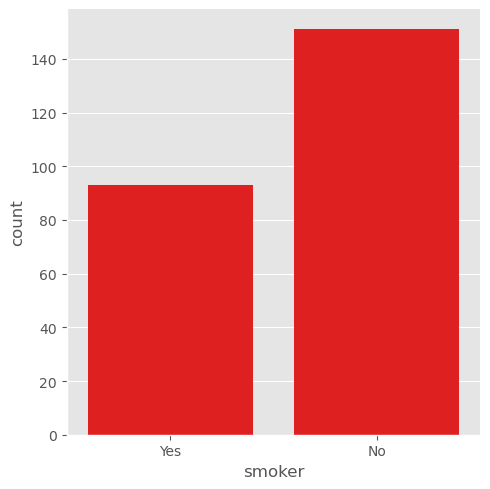

In [6]:
# The following barchart show the distribution of smokers vs. non-smokers

sns.catplot(x = 'smoker', kind = 'count', data = tips, color= 'red')

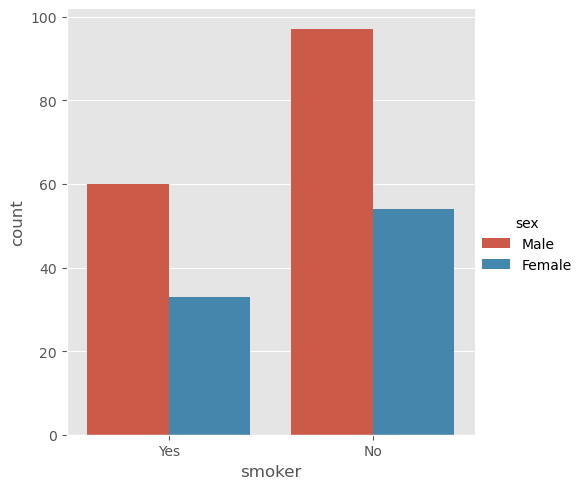

In [7]:
# Interaction of two categorical variables

sns.catplot(x = 'smoker', kind = 'count', hue = 'sex',  data = tips)

### 4.2.2 Mosaic Plot

- To create the mosaic plot, we will use the mosaic function from statsmodels python package

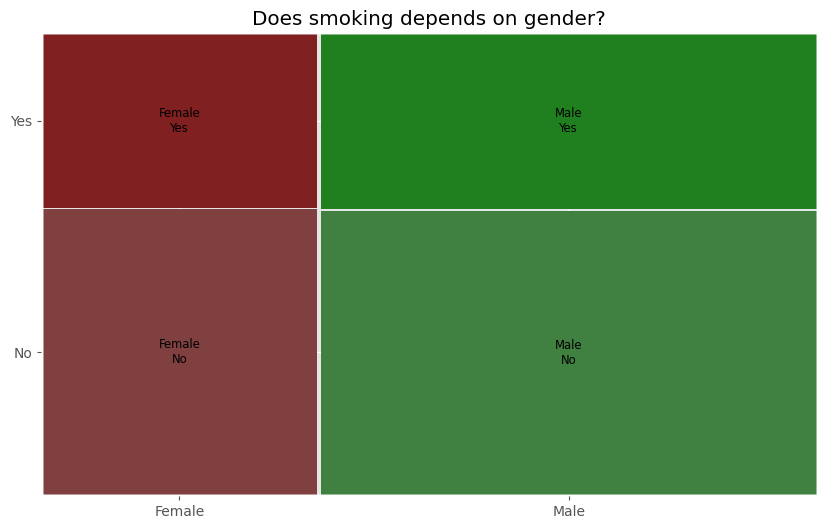

In [8]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(tips, ['sex', 'smoker'], title = 'Does smoking depends on gender?')

plt.show()

### 4.2.3 Side-by-side boxplot

- This kind of plot shows the three quartile values of the distribution along with extreme values.
- The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile
- Observations that fall outside this range are displayed independently

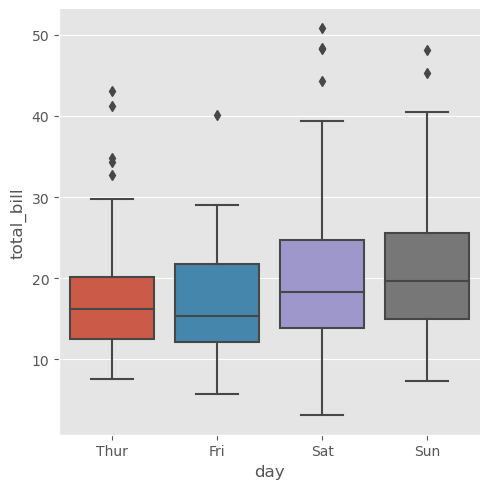

In [9]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips)

- We can add a third dimension(categorical) to our side-by-side box plot using a hue semantic

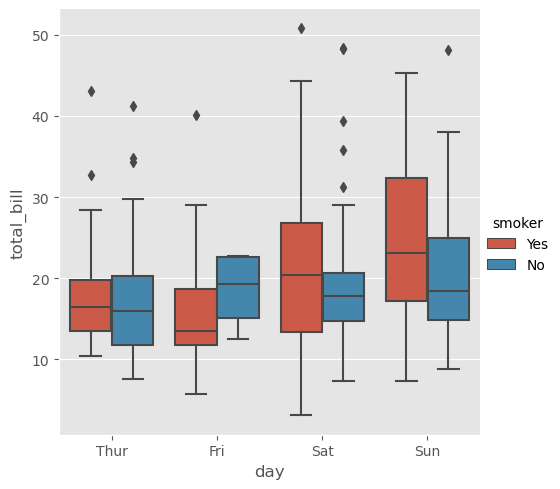

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

### 4.4.4 Creating a New Variable to Color Plots Based on a Condition

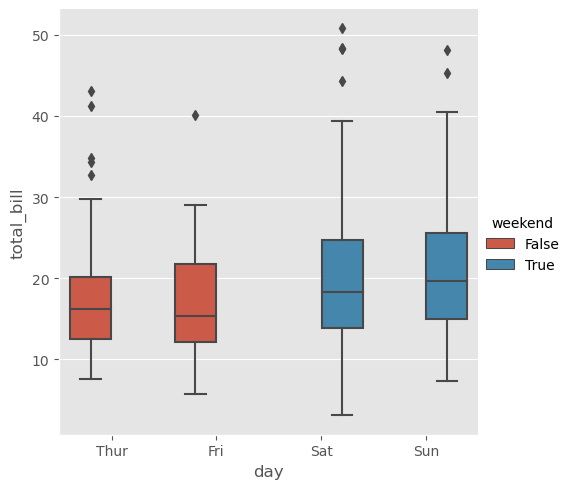

In [6]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"]) 


sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", data=tips)

### 4.4.5 Point Plot

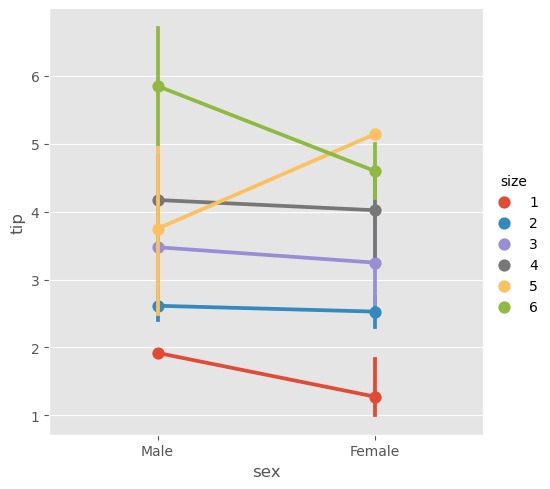

In [7]:
sns.catplot(x = 'sex', y = 'tip', hue = 'size', data = tips, kind = 'point')

## 4.3 EDA for One Numerical Variable

In [13]:
cardio = pd.read_csv('CardioGoodFitness.csv')
cardio.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## 4.3.1 Numerical Summaries

In [15]:
cardio.Age.mean()

28.788888888888888

In [14]:
cardio.describe().round()

,Age,Education,Usage,Fitness,Income,Miles
count,180.0,180.0,180.0,180.0,180.0,180.0
mean,29.0,16.0,3.0,3.0,53720.0,103.0
std,7.0,2.0,1.0,1.0,16507.0,52.0
min,18.0,12.0,2.0,1.0,29562.0,21.0
25%,24.0,14.0,3.0,3.0,44059.0,66.0
50%,26.0,16.0,3.0,3.0,50596.0,94.0
75%,33.0,16.0,4.0,4.0,58668.0,115.0
max,50.0,21.0,7.0,5.0,104581.0,360.0


## 4.3.1 Histograms

- Histograms are only for numerical variables
- Based on our data exploration before, we can be studing the distribution of Age, Income and Miles using a histogram.

https://seaborn.pydata.org/generated/seaborn.distplot.html

Text(0.5, 1.0, 'Age Disribution of Cardio GoodFitness Customers')

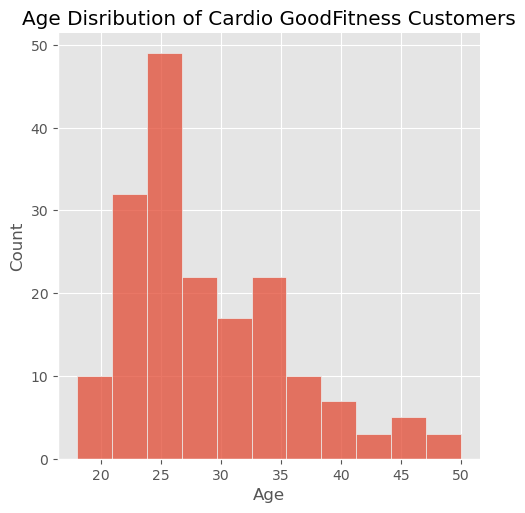

In [20]:
sns.displot(cardio.Age)
plt.title('Age Disribution of Cardio GoodFitness Customers')


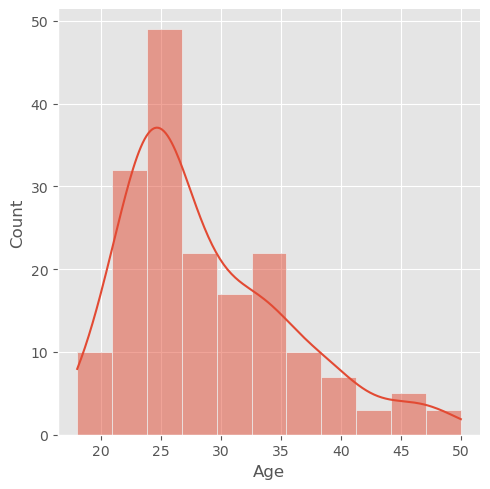

In [21]:
sns.displot(cardio.Age, kde= True)

In [ ]:
sns.histplot(cardio.Age)

## 4.3.3 Boxplots

<Axes: ylabel='Income'>

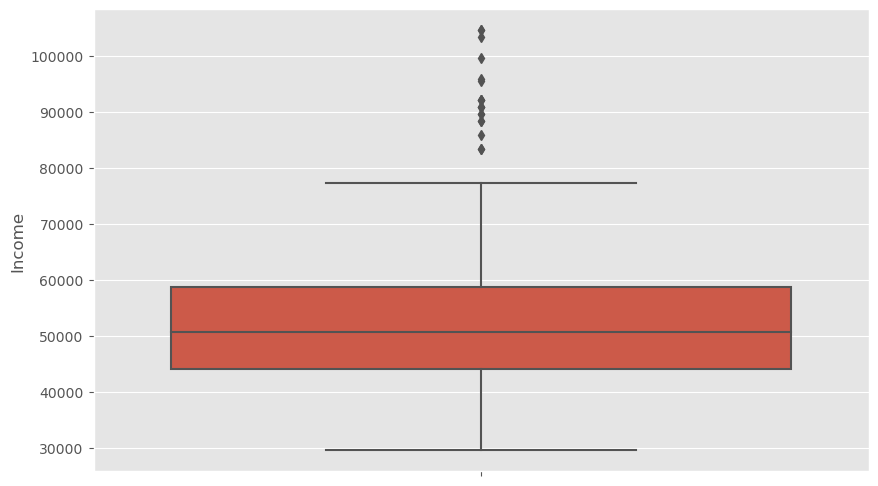

In [22]:
# Income Distribution

# Based on the boxplot, we can see that:

# income ranges between 30K and 100K. 
# 50% of the CardioGood customers have income between 45K and 60K
# 25% of the customers have income higher than 60K
# 25% of the customers have income lower than 30K
# the median income for customers is around 50K (i.e. 50% of the customers earn more than 50K)
# we see some customers with an outlier income (80K and above)

sns.boxplot(data = cardio, y= 'Income')

<Axes: xlabel='Income'>

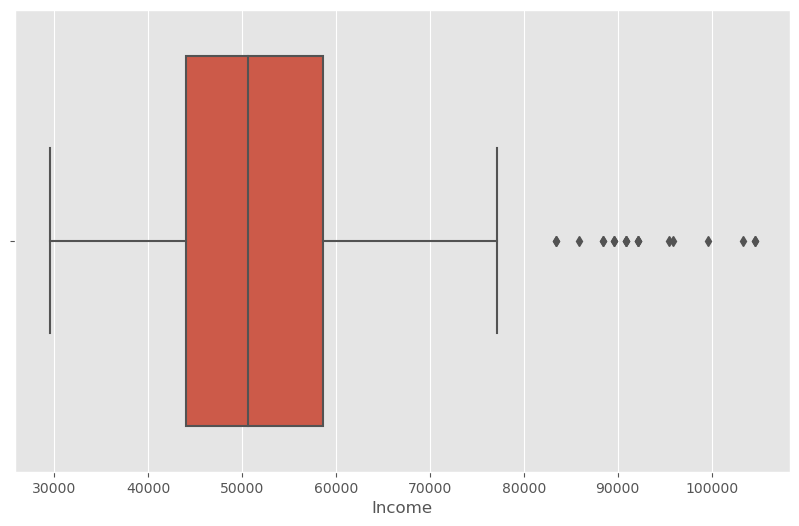

In [24]:
# Horizontal Boxplot

sns.boxplot(data = cardio, x= 'Income')

## 4.3.4 Visualizing Interaction btween One Numerical Variable and One Categorical Variable

<Axes: xlabel='Product', ylabel='Income'>

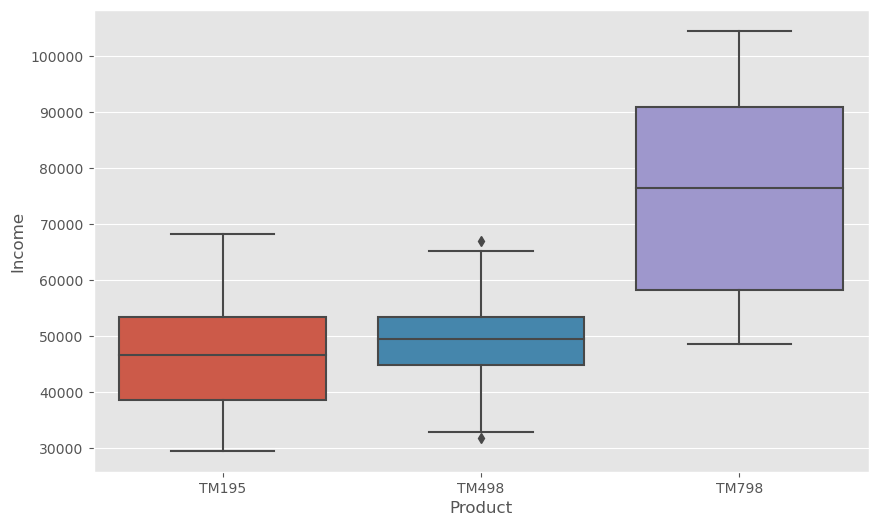

In [23]:
# Interaction: Product x Income

# We can see that prodcut TM798 is baught by customer with high income compared to the other two products
# The other two products (TM195 and TM498) are mostly bought by people of lower income (less than 70K with majority less than 55K)


sns.boxplot(data = cardio, 
            x = 'Product', 
            y = 'Income')

<Axes: xlabel='Product', ylabel='Miles'>

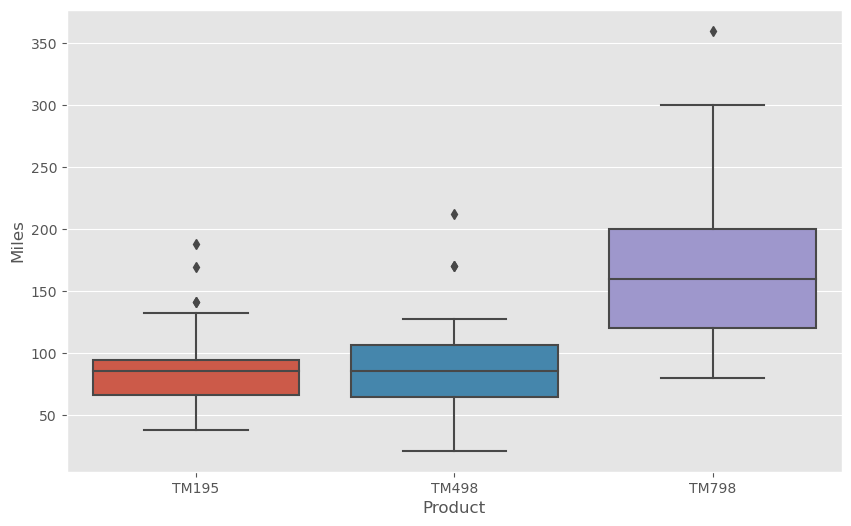

In [25]:
# Interaction: Product x Miles

# It seems that people who expect to walk/run more miles per week are using the product TM798 
# 75% expects to move more than 140 miles per week
# Customers who baught TM195 and TM498 expect to walk/run less per than 140 miles per week

sns.boxplot(data = cardio, 
            x = 'Product', 
            y = 'Miles')

<Axes: xlabel='Fitness', ylabel='Age'>

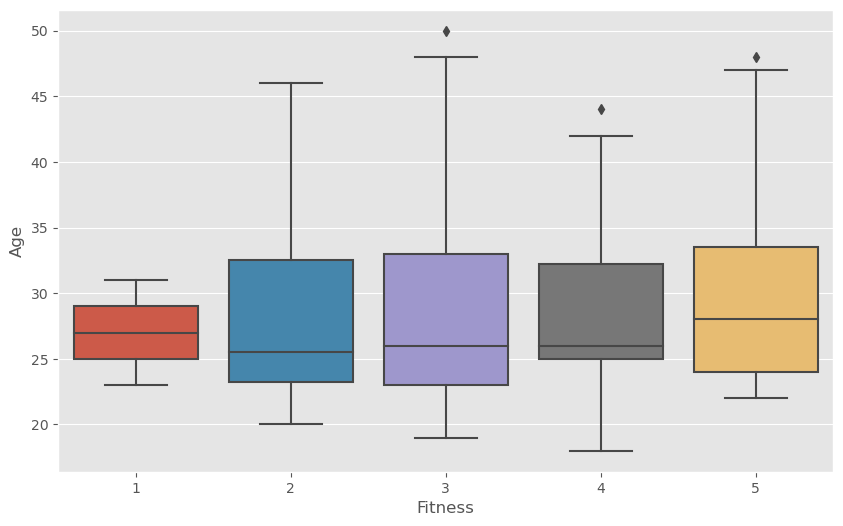

In [26]:
# Interaction: Fitness x Age

# Customers who rated themselves very low on fitness are in their 20's mostly
# That does not mean that all customers in their 20's rated themselves low


sns.boxplot(data = cardio, 
            x = 'Fitness', 
            y = 'Age')

<Axes: xlabel='Fitness', ylabel='Miles'>

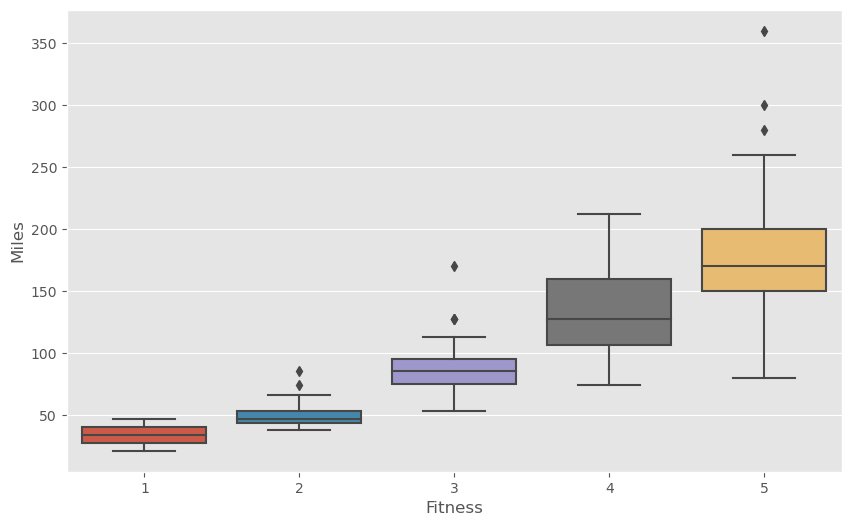

In [27]:
# Interaction: Fitness x Miles

# There is an clear positive corrlation between fitness ratings and the number of miles customers expect to walk/run
# Customers who rated themselves as "athletes" expect to run a lot of miles (more than 75% expect to walk/run more than 150 miles per week)


sns.boxplot(data = cardio, 
            x = 'Fitness', 
            y = 'Miles')

<Axes: xlabel='Product', ylabel='Income'>

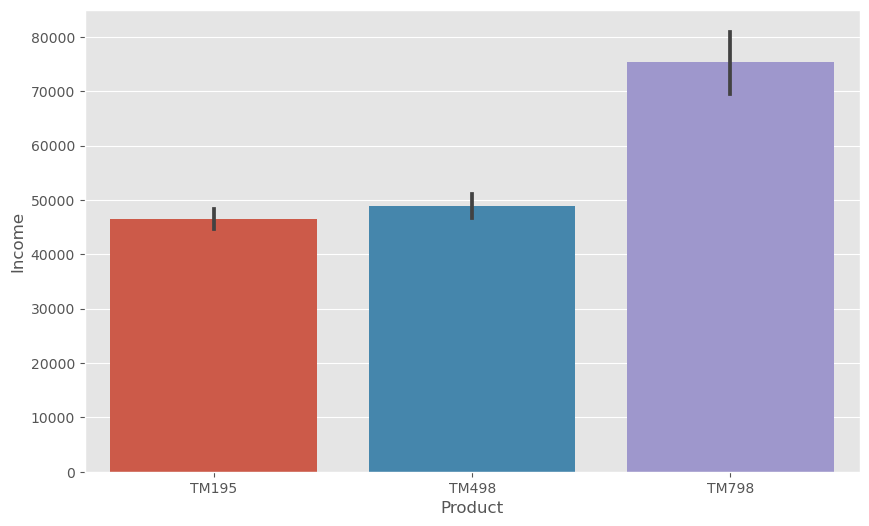

In [29]:
# Product x Income

sns.barplot(data= cardio, x = 'Product',y = 'Income')

<Axes: xlabel='Product', ylabel='Income'>

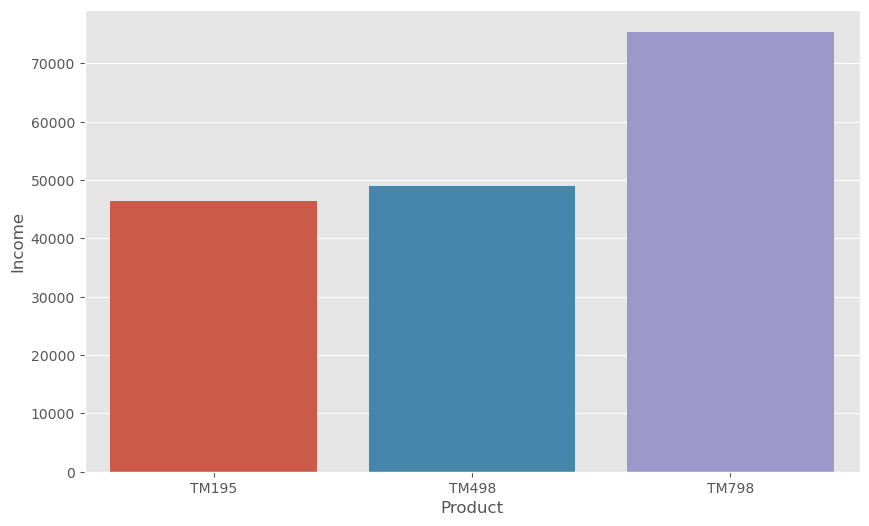

In [22]:
# We can get rid of the (confidence interval) ci around the mean value as follows

sns.barplot(data= cardio, 
            x = 'Product',
            y = 'Income', 
            errorbar=None)

# 4.4 EDA for Two Numerical Variables

## 4.4.1 Correlation and Correlation Matrix

In [30]:
# correlation
cardio['Age'].corr(cardio['Miles'])


0.0366175690582711

In [44]:
# correlation matirx
cardio.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


## 4.4.2 Visualizing Two Numerical Variables

### Pair plots

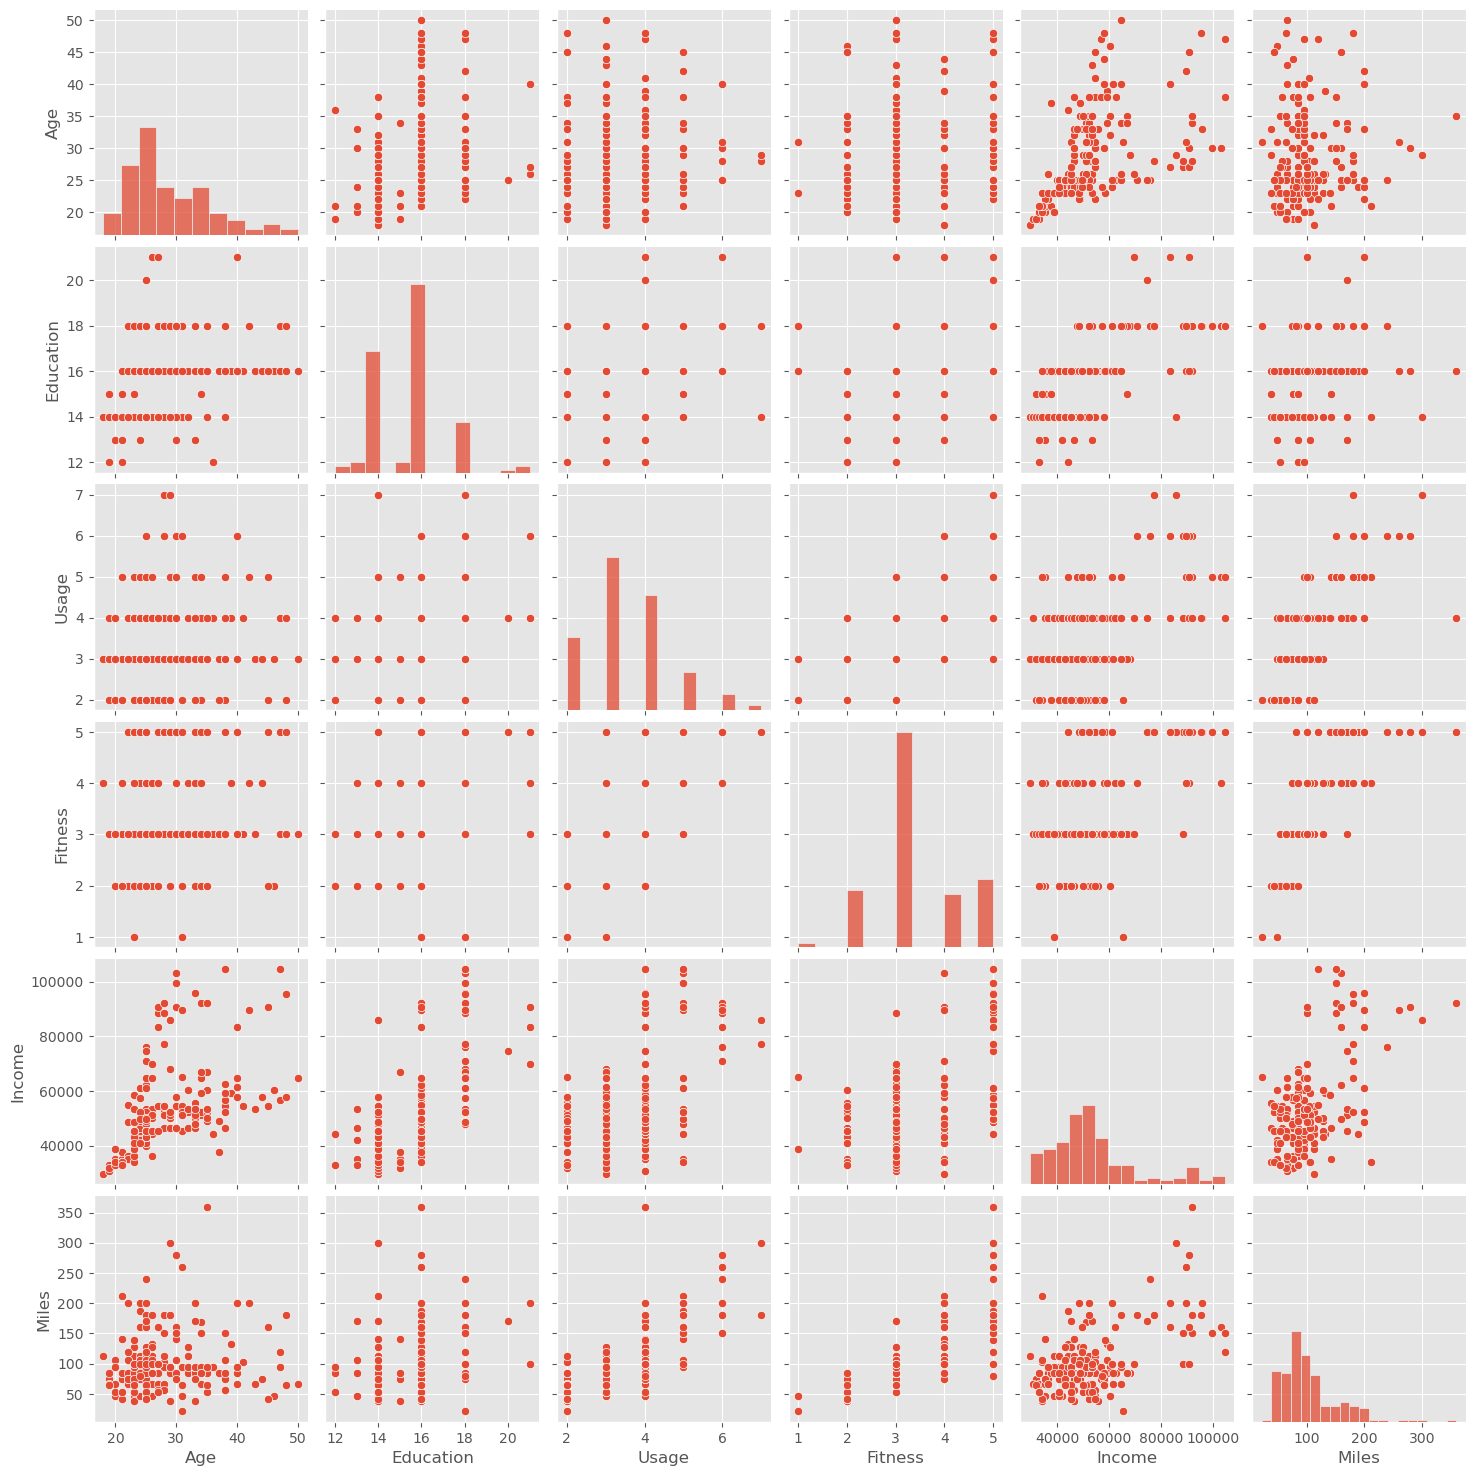

In [32]:
sns.pairplot(cardio)

### Correlation Heatmap

<Axes: >

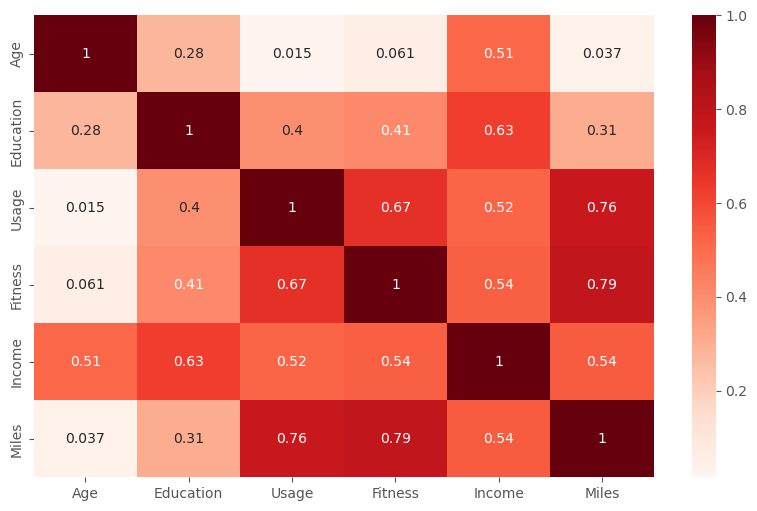

In [45]:
cor_matrix = cardio.corr(numeric_only=True)

sns.heatmap(cor_matrix,
            annot = True,
            cmap = 'Reds')

<Axes: >

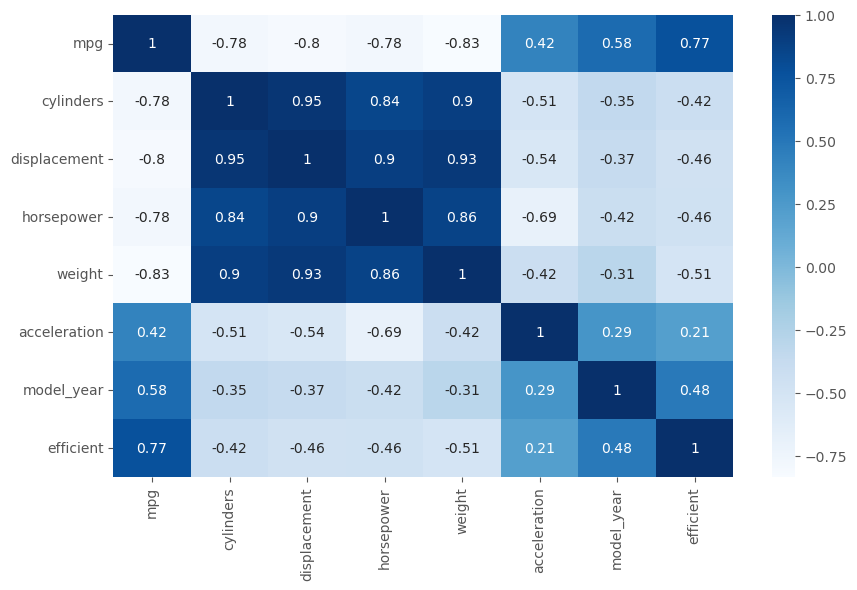

In [21]:
mpg_matrix=mpg.corr(numeric_only=True)
sns.heatmap(mpg_matrix,annot=True,cmap='Blues')

### Scatterplot

In [ ]:
sns.scatterplot(data = cardio, x = 'Age', y = 'Income')

### Scatterplot with a Categorical Variable

- Scatterplot for the numerical variables, and use color of the point for one of the categorical variable
- Scatterplot for the numerical variables, and use size of the point for one of the categorical variable
- Scatterplot for the numerical variables, and use shape of the point for one of the categorical variable

<Axes: xlabel='Age', ylabel='Income'>

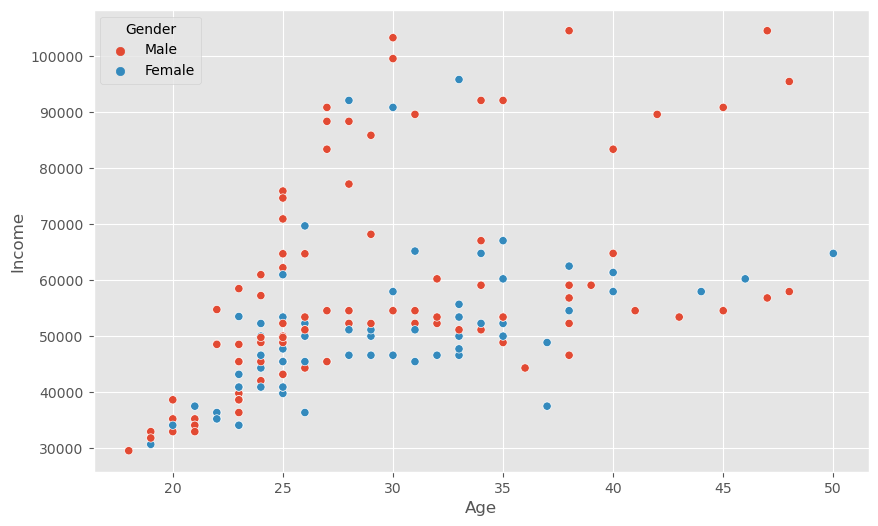

In [36]:
# using color 
sns.scatterplot(data = cardio, 
                x = 'Age', 
                y = 'Income', 
                hue = 'Gender')

<Axes: xlabel='Age', ylabel='Income'>

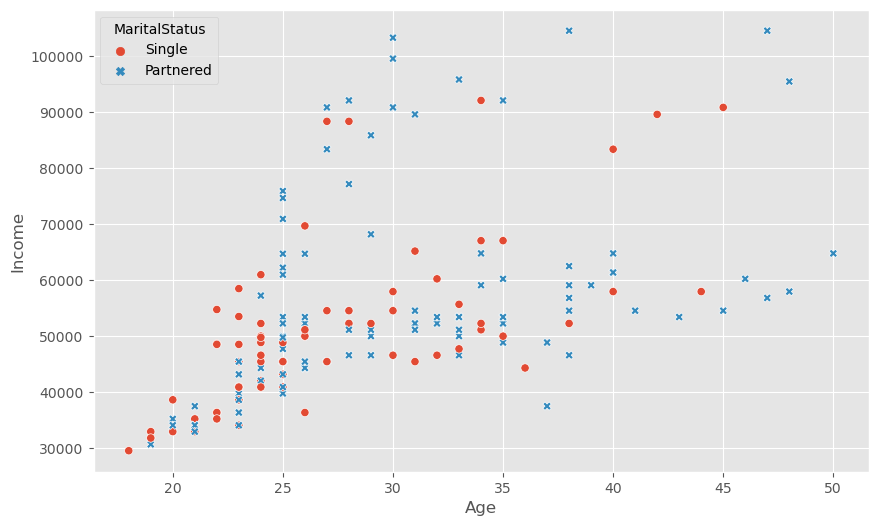

In [37]:
# using shape/style  
sns.scatterplot(data = cardio, 
                x = 'Age', 
                y = 'Income', 
                style = 'MaritalStatus',
                hue = 'MaritalStatus')

### Facetplots

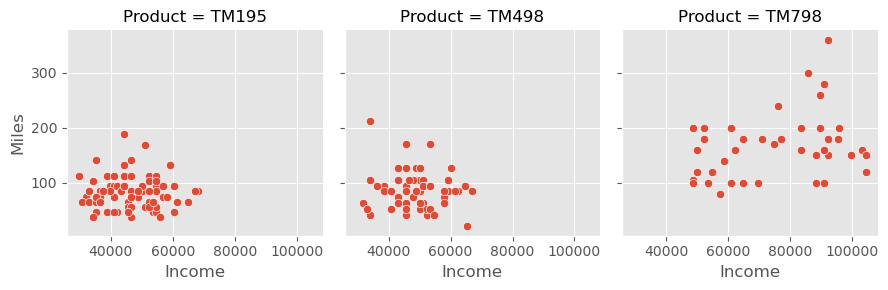

In [14]:
g = sns.FacetGrid(cardio, col="Product")
g.map(sns.scatterplot, "Income", "Miles")


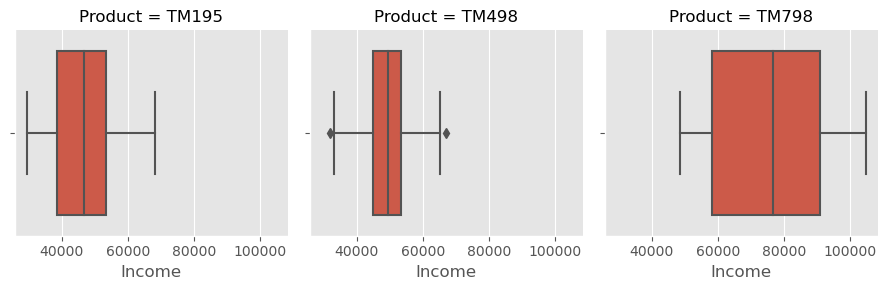

In [51]:
# Facetplots could be used with other types of plots as well

g = sns.FacetGrid(cardio, col="Product")
g.map(sns.boxplot, "Income",order=['TM195','TM498','TM798'])


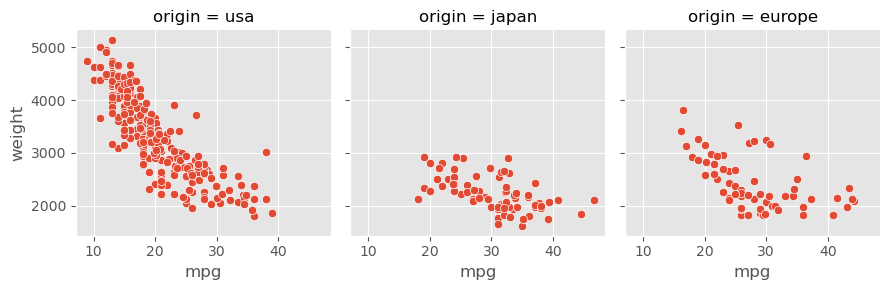

In [17]:
g=sns.FacetGrid(mpg,col='origin')
g.map(sns.scatterplot, "mpg",'weight')

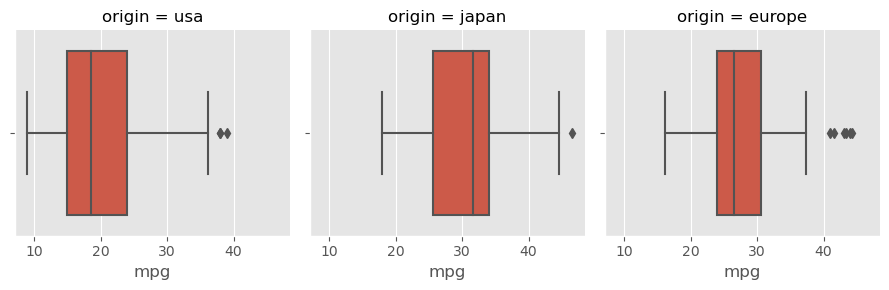

In [18]:
g=sns.FacetGrid(mpg,col='origin')
g.map(sns.boxplot,'mpg',order=['usa','japan','europe'])

<Axes: xlabel='weight', ylabel='mpg'>

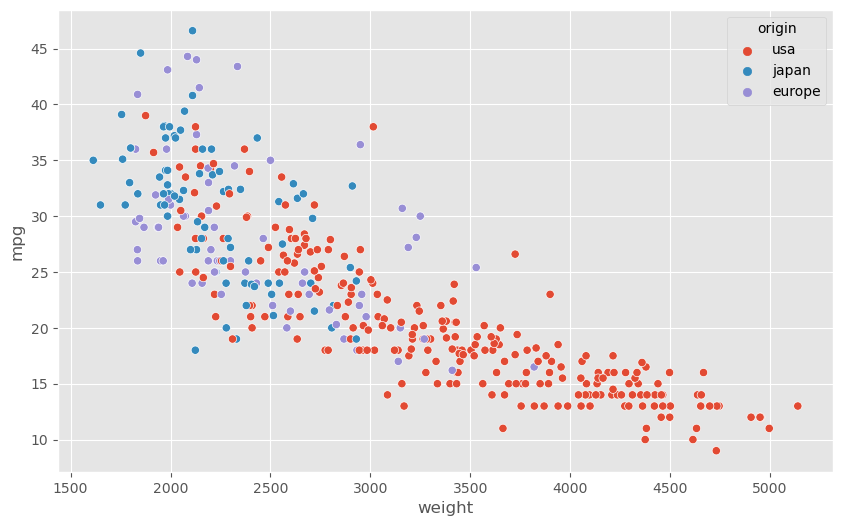

In [20]:
sns.scatterplot(data=mpg,x='weight',y='mpg',hue='origin')

<Axes: xlabel='weight', ylabel='mpg'>

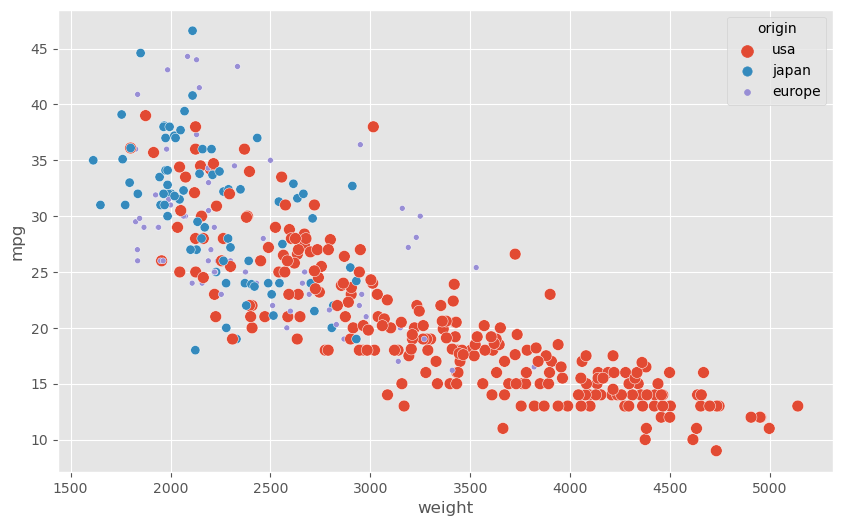

In [19]:
sns.scatterplot(data=mpg,x='weight',y='mpg',hue='origin',size='origin')